[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/diogoflim/AM/blob/main/Exemplo_regpolin.ipynb)


# Regressão Polinomial

Modelos de estrutura mais complexa que a estrutura de genérica do modelo linear podem, ainda, ser tratados por meio de regressão linear. 

Por exemplo, um modelo polinomial nas variáveis da regressão pode ser transformado em um modelo linear:

$$y=w_0+w_1x_1+w_2x_1^2+w_3x_1^3+\epsilon\rightarrow y=w_0+w_1x_1+w_2x_2+w_3x_3+\epsilon$$

Além disso, efeitos de interação entre variáveis podem ser tratados de maneira linear, por exemplo, pode-se considerar o produto entre duas variáveis como uma nova variável. Dessa forma:


$$y=w_0+w_1x_1+w_2x_1^2+w_3x_1x_2+\epsilon\rightarrow y=w_0+w_1x_1+w_2x_2+w_3x_3+\epsilon$$




## Interpretação

**Importante**: Embora estes modelos ainda sejam considerados de regressão linear, a forma da superfície gerada por eles não é linear.


**Podemos encontrar modelos mais complexos com a mesma formulação aprendida na aula até aqui!**

Em geral, qualquer modelo de regressão que seja linear em parâmetros ($\mathbf{w}$) é um modelo de regressão linear, independentemente da forma da superfície que ele gera. 


# Exemplo

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline


In [59]:
n = 100
X = 6 * np.random.rand(n, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(n, 1)

In [60]:
print(X[:5])

[[ 1.10396041]
 [ 0.90121856]
 [-0.41480359]
 [ 1.29045688]
 [-0.87257294]]


In [61]:
print(y[0:5])

[[1.40215088]
 [2.1728924 ]
 [1.09486696]
 [3.70706364]
 [1.611781  ]]


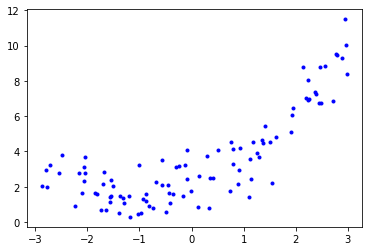

In [62]:
plt.plot(X, y, "b.")


## Transformando os atributos com sklearn

Temos apenas 1 atributo em X. Porém, podemos perceber graficamente que nossa relação é não linear (uma parábola).

Vamos adicionar um novo atributo a nossa matriz de modo que este receba o quadrado do nosso atributo original. 

In [63]:
X[0:10]

array([[ 1.10396041],
       [ 0.90121856],
       [-0.41480359],
       [ 1.29045688],
       [-0.87257294],
       [-2.06437172],
       [ 1.62330439],
       [-2.49006899],
       [-0.13063405],
       [-0.01180187]])

In [64]:
transf = PolynomialFeatures(degree=2, include_bias=False)
X_2 = transf.fit_transform(X)


In [65]:
X_2[0:10]

array([[ 1.10396041e+00,  1.21872858e+00],
       [ 9.01218564e-01,  8.12194900e-01],
       [-4.14803590e-01,  1.72062018e-01],
       [ 1.29045688e+00,  1.66527895e+00],
       [-8.72572942e-01,  7.61383540e-01],
       [-2.06437172e+00,  4.26163059e+00],
       [ 1.62330439e+00,  2.63511716e+00],
       [-2.49006899e+00,  6.20044358e+00],
       [-1.30634052e-01,  1.70652556e-02],
       [-1.18018704e-02,  1.39284146e-04]])

In [66]:
lin_reg = LinearRegression()
lin_reg.fit(X_2, y)

print(f"b = {lin_reg.intercept_}, w= {lin_reg.coef_}")

b = [2.05220085], w= [[1.05763939 0.50793545]]


**Digamos que recebemos 100 novos exemplos.**

In [67]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)

In [68]:
X_new_2 = transf.transform(X_new)
y_new_2 = lin_reg.predict(X_new_2)

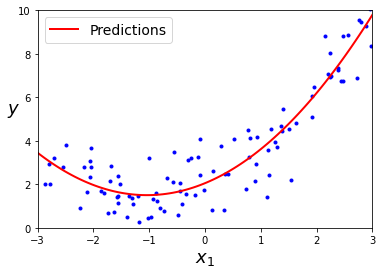

In [69]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new_2, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

## Analisando situações de overfitting e underfitting pelo hiperparâmetro "degree"

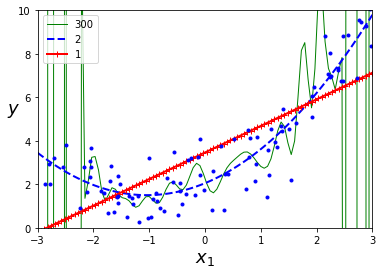

In [74]:
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()